In [71]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import praw

user_agent = "Scraper 1.0"
reddit = praw.Reddit(
    client_id = "gscPTd0wywq_IjgqoL1Smg",
    client_secret = "UAeWcM7eWeVXQVRJLZehtFq655Dzmw",
    user_agent = user_agent
)

In [73]:
headlines = set()

for submission in reddit.subreddit('btc').hot(limit = None):
    #print(submission.title)
    #print(submission.id)
    #print(submission.author)
    #print(submission.created_utc)
    #print(submission.score)
    #print(submission.upvote_ratio)
    #print(submission.url)
    #break
    headlines.add(submission.title)
for submission in reddit.subreddit('binance').hot(limit = None):
    headlines.add(submission.title)
for submission in reddit.subreddit('coinbase').hot(limit = None):
    headlines.add(submission.title)
for submission in reddit.subreddit('bitcoin').hot(limit = None):
    headlines.add(submission.title)
print(len(headlines))


2896


In [74]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Giacomo Zucco on Swiss TV: Bitcoin should regu...
1,How do you remove a coin from your “my assets”...
2,*gives all his savings to this dude on some we...
3,ID verification process failure
4,Bought a micro bitcoin miner to learn about th...


In [75]:
df.to_csv('./CSV-files/crypto-headlines.csv', header = False, encoding = 'utf-8', index = False)

In [76]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/albert/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [77]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width = 100 )

[{'compound': 0.0,
  'headline': 'Giacomo Zucco on Swiss TV: Bitcoin should regulate state finance ',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.9001,
  'headline': 'How do you remove a coin from your “my assets”. It’s annoying as fuck that there is '
              'no intuitive way to do that. I have a bunch of shit at zero that I have to look at '
              'every time go.',
  'neg': 0.273,
  'neu': 0.727,
  'pos': 0.0},
 {'compound': 0.8338,
  'headline': '*gives all his savings to this dude on some website* Imagine not using self-custody '
              'but trusting some website with your wealth.',
  'neg': 0.0,
  'neu': 0.708,
  'pos': 0.292}]


In [78]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Giacomo Zucco on Swiss TV: Bitcoin should regu...
1,0.273,0.727,0.000,-0.9001,How do you remove a coin from your “my assets”...
2,0.000,0.708,0.292,0.8338,*gives all his savings to this dude on some we...
3,0.524,0.476,0.000,-0.5106,ID verification process failure
4,0.000,1.000,0.000,0.0000,Bought a micro bitcoin miner to learn about th...


In [79]:
df['label'] = 0 
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < 0.2, 'label'] = -1
df.loc[(0.2 > df['compound']) & (df['compound'] > -0.2), 'label'] = 0
df.head()



,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Giacomo Zucco on Swiss TV: Bitcoin should regu...,0
1,0.273,0.727,0.000,-0.9001,How do you remove a coin from your “my assets”...,-1
2,0.000,0.708,0.292,0.8338,*gives all his savings to this dude on some we...,1
3,0.524,0.476,0.000,-0.5106,ID verification process failure,-1
4,0.000,1.000,0.000,0.0000,Bought a micro bitcoin miner to learn about th...,0


In [80]:
df2 = df[['headline', 'label']]

In [81]:
df2.to_csv('./CSV-files/crypto-headlines.csv', encoding = 'utf-8', index = False)

In [82]:
df.label.value_counts()

label
 0    1739
 1     676
-1     481
Name: count, dtype: int64

In [83]:
df.label.value_counts(normalize = True) * 100

label
 0    60.048343
 1    23.342541
-1    16.609116
Name: proportion, dtype: float64

In [84]:
print("Positive headlines: \n")
pprint(list(df[df['label'] == 1].headline)[:5], width = 200)

print("\nNegative headlines: \n")
pprint(list(df[df['label'] == -1].headline)[:5], width = 200)

Positive headlines: 

['*gives all his savings to this dude on some website* Imagine not using self-custody but trusting some website with your wealth.',
 'Bitcoin is freedom',
 'Anyone can help ?',
 'I recommend not to use Binance card',
 'Staking rewards and lifetime earnings for ETH']

Negative headlines: 

['How do you remove a coin from your “my assets”. It’s annoying as fuck that there is no intuitive way to do that. I have a bunch of shit at zero that I have to look at every time go.',
 'ID verification process failure',
 'Keep layer 1 simple, make up for it on layer 2" is NOT a universal answer to blockchain scalability and functionality problems, because it fails to take into account that layer 1 blockchains '
 'themselves must have a sufficient level of scalability and functionality for this "building on top”. -Vitalik',
 'why are binance withdrawals and deposits "temporarily suspended" in holland?',
 'Case closed with no update']


/tmp/ipykernel_5925/3139448537.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Negative", "Neutral", "Positive"])


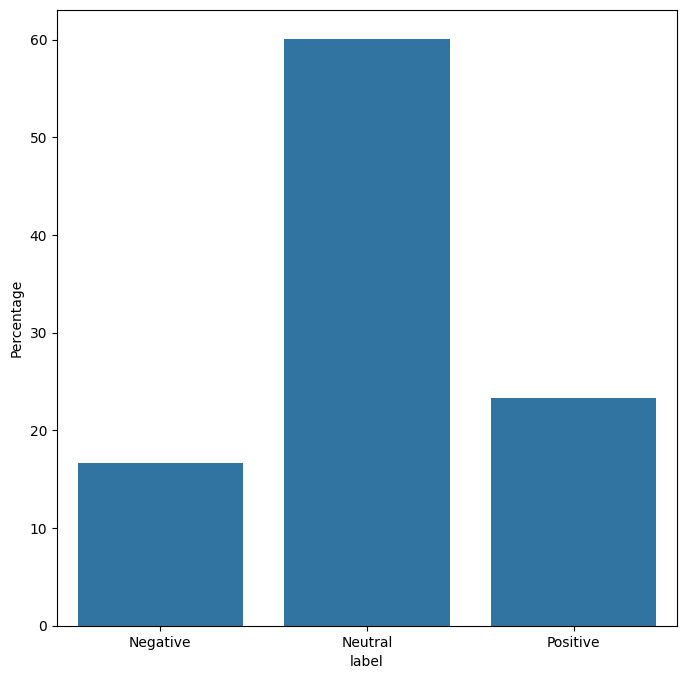

In [85]:
fig, ax = plt.subplots(figsize = (8, 8))
counts = df.label.value_counts(normalize = True)*100

sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(["Negative", "Neutral", "Positive"])
ax.set_ylabel("Percentage")
plt.show()

In [86]:
#compound score is the overall sentiment of the headline, 
#which can range from -1 to +1 with -1 being negative sentiment and +1 being positive
#final input into the ML models will be the compound score
compound = df[['compound', 'headline']]
compound.head()


,compound,headline
0,0.0000,Giacomo Zucco on Swiss TV: Bitcoin should regu...
1,-0.9001,How do you remove a coin from your “my assets”...
2,0.8338,*gives all his savings to this dude on some we...
3,-0.5106,ID verification process failure
4,0.0000,Bought a micro bitcoin miner to learn about th...


In [87]:
#average of all compound scores 
#normalized to [0,1] and expressed in percentage
mean = df["compound"].mean()
mean = ((mean+1)/2)*100
print(mean)
df['mean']=mean

51.85876726519337


In [88]:
#making a CSV file with today's date and mean value of sentiments as the columns
from datetime import datetime
df['date']= datetime.today().strftime('%Y-%m-%d')
valuesdf = df[['date', 'mean']].head(1)
valuesdf.to_csv('./CSV-files/crypto-values.csv', encoding = 'utf-8', index = False)